In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-dataset/used_car_dataset.csv


Load the dataset and look at the first few rows of data.

In [2]:
df = pd.read_csv('/kaggle/input/used-car-dataset/used_car_dataset.csv')
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


Let's see the total number of rows and columns.

In [3]:
df.shape

(9582, 11)

Let's see if we have any missing values in this table.

In [4]:
df.info()       # Information about columns, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


All of the features except 'kmDriven' are complete.

In [5]:
# Count missing values in 'kmDriven'
missing_values = df.kmDriven.isna().sum()

# Display the result
print(f'The kmDriven feature is missing {missing_values} values')

The kmDriven feature is missing 47 values


Let's see the rows with missing kmDriven and see if we can spot any similarities between the entries.

In [6]:
# Show rows where column kmDriven has missing values
rows_with_missing = df[df['kmDriven'].isna()]

# Display the result
print(rows_with_missing)

              Brand              model  Year  Age kmDriven Transmission  \
231   Maruti Suzuki           Alto-800  2019    5      NaN       Manual   
353          Toyota             Innova  2016    8      NaN       Manual   
444           Honda            City ZX  2024    0      NaN    Automatic   
476         Hyundai        Santro Xing  2010   14      NaN    Automatic   
608          Toyota              Etios  2012   12      NaN       Manual   
793           Skoda             Kushaq  2010   14      NaN    Automatic   
976        Mahindra    Bolero Neo Plus  2015    9      NaN    Automatic   
1164       Mahindra         Bolero Neo  2023    1      NaN       Manual   
1199           Tata             Indica  2014   10      NaN       Manual   
1413        Hyundai        Santro Xing  2007   17      NaN       Manual   
1978           Tata          Tiago Nrg  2021    3      NaN    Automatic   
2680  Maruti Suzuki         Zen-Estilo  2008   16      NaN    Automatic   
2847  Maruti Suzuki      

I'm seeing a lot of 'Maruti Suzuki' entries. I wonder how common this Brand is in India? There are a few rows with this value for Brand in the rows with missing prices. Let's see how many rows have 'Maruti Suzuki' as the Brand in the whole dataset.

In [7]:
# Count rows where model has the value "Maruti Suzuki"
rows_count = (df['Brand'] == 'Maruti Suzuki').sum()
rows_count

2720

OK! That's a lot more than I expected. I don't think we need to worry too much about the large representation of 'Maruti Suzuki' branded cars in the rows with missing prices.

Next, let's remove the rows with missing 'kmDriven' values. We will also clean up the 'kmDriven' and convert it to an integer datatype.

In [8]:
#  Clean up the kmDriven text
df["kmDriven"] = (
    df["kmDriven"]
    .str.replace(",", "", regex=False)
    .str.replace(" km", "", regex=False)
    .astype(float)  # Convert to float
)

# Drop rows with NaN in kmDriven
df = df.dropna(subset=["kmDriven"])

# Convert to integer
df["kmDriven"] = df["kmDriven"].astype(int)

Let's also clean up AskPrice.

In [9]:
#  Clean up the kmDriven text
df["AskPrice"] = (
    df["AskPrice"]
    .str.replace(",", "", regex=False)
    .str.replace("₹", "", regex=False)
    .astype(float)  # Convert to float
)

# Convert to integer
df["AskPrice"] = df["AskPrice"].astype(int)

Let's verify that 'kmDriven' and 'AskPrice' are integers now.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   Age           9535 non-null   int64 
 4   kmDriven      9535 non-null   int64 
 5   Transmission  9535 non-null   object
 6   Owner         9535 non-null   object
 7   FuelType      9535 non-null   object
 8   PostedDate    9535 non-null   object
 9   AdditionInfo  9535 non-null   object
 10  AskPrice      9535 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 893.9+ KB


Indeed they are.
Are the rows with missing values gone?

In [11]:
df.info()       

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   Age           9535 non-null   int64 
 4   kmDriven      9535 non-null   int64 
 5   Transmission  9535 non-null   object
 6   Owner         9535 non-null   object
 7   FuelType      9535 non-null   object
 8   PostedDate    9535 non-null   object
 9   AdditionInfo  9535 non-null   object
 10  AskPrice      9535 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 893.9+ KB


Yes they are! The dataset has no missing values now.

Now we need to look at some of these features and determine the categorical data in them, and how we will need to encode them.

Here are the unique values in each feature. This should give us an indication of which features are categorical.

In [12]:
unique_counts = df.nunique(dropna=False)

# Display the result
print(unique_counts)

Brand             38
model            398
Year              32
Age               32
kmDriven        1745
Transmission       2
Owner              2
FuelType           3
PostedDate        12
AdditionInfo    7270
AskPrice        1326
dtype: int64


It looks like we need to consider the features "Brand", "Model", "Transmission", "Owner", and "FuelType" for encoding.

Let's start by ensuring there are no accidental duplicate entries in "Brand" due to typos.

In [13]:
# Show unique values of Brand
unique_brands = sorted(df["Brand"].unique())

# Display the result
print(unique_brands)

['Ambassador', 'Ashok', 'Aston Martin', 'Audi', 'BMW', 'Bajaj', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'MG', 'Mahindra', 'Maruti Suzuki', 'Maserati', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Porsche', 'Renault', 'Rolls-Royce', 'Skoda', 'Ssangyong', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


Good. They are all unique brands.

Let's check for typos in Year and Age.

In [14]:
# Show unique values of Year
unique_years = sorted(df["Year"].unique())

# Display the result
print(unique_years)

[1986, 1990, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [15]:
# Show unique values of Age
unique_ages = sorted(df["Age"].unique())

# Display the result
print(unique_ages)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 34, 38]


No typos.

Now let's check the unique values of Transmission, Owners, and FuelType.

In [16]:
# Show unique values of Transmission
unique_transmissions = sorted(df["Transmission"].unique())

# Display the result
print(unique_transmissions)

['Automatic', 'Manual']


In [17]:
# Show unique values of Owner
unique_owners = sorted(df["Owner"].unique())

# Display the result
print(unique_owners)

['first', 'second']


In [18]:
# Show unique values of FuelType
unique_fuel_types = sorted(df["FuelType"].unique())

# Display the result
print(unique_fuel_types)

['Diesel', 'Hybrid/CNG', 'Petrol']


These all are categorical features.

See which variables relate to each other.

In [19]:
X = df.copy()
y = X.pop("AskPrice")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [20]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show features with their MI scores

AdditionInfo    3.307861
model           1.182237
Brand           0.462218
kmDriven        0.429166
Year            0.397452
Age             0.397452
Transmission    0.130497
FuelType        0.128565
Owner           0.050002
PostedDate      0.008548
Name: MI Scores, dtype: float64

**Columns to be dropped from the dataset:**
* AdditionalInfo - Despite the high score, this contains redundant information found elsewhere in the dataset.
* Age - Essentially contains the same information as 'Year'.
* PostedDate - Has insignificant contributions to the target.

In [21]:
df = df.drop(columns=['AdditionInfo', 'PostedDate', 'Age'])

**Columns needing more research:**
* Transmission
* FuelType
* Owner

Let's plot the average AskPrice by Transmission type.

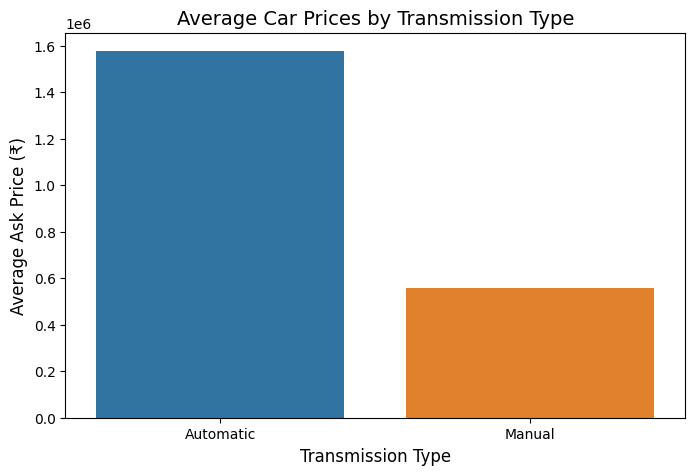

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by transmission type and calculate average price
price_trends_by_transmission = (
    df.groupby('Transmission')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by transmission
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_transmission, 
    x='Transmission', 
    y='AskPrice'
)
plt.title('Average Car Prices by Transmission Type', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

Wow! There is a BIG difference between Automatic and Manual Transmission types. We will keep this feature.

What about the Owner feature?

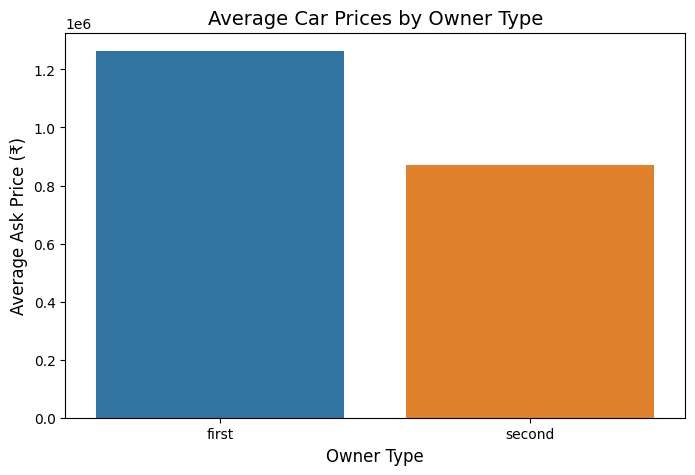

In [23]:
# Group by owner type and calculate average price
price_trends_by_owner = (
    df.groupby('Owner')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by owner
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_owner, 
    x='Owner', 
    y='AskPrice'
)
plt.title('Average Car Prices by Owner Type', fontsize=14)
plt.xlabel('Owner Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

There is a significant difference in the AskPrice for first and second owners. We will also keep this feature.  

Last, let's examine FuelType.

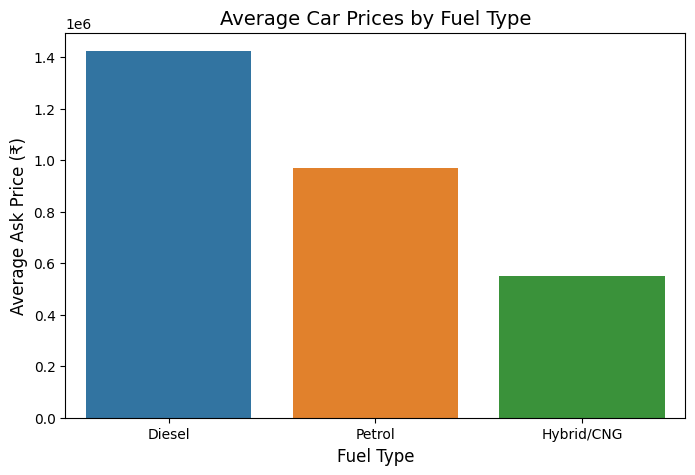

In [24]:
# Group by fuel type and calculate average price
price_trends_by_fuel_type = (
    df.groupby('FuelType')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by fuel type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_fuel_type, 
    x='FuelType', 
    y='AskPrice'
)
plt.title('Average Car Prices by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

There is a large difference between average asking prices for these three FuelTypes, si we will keep this feature. Surprisingly, Hybrid/CNG is lowest average AskPrice even as Hybrid cars are quite expensive. However, Compressed Natural Gas (CNG) vehicles can be quite inexpensive, and appear to make up a more significant portion of the dataset than more expensive Hybrid cards.

Just for fun, let's see the average asking price for each Brand.

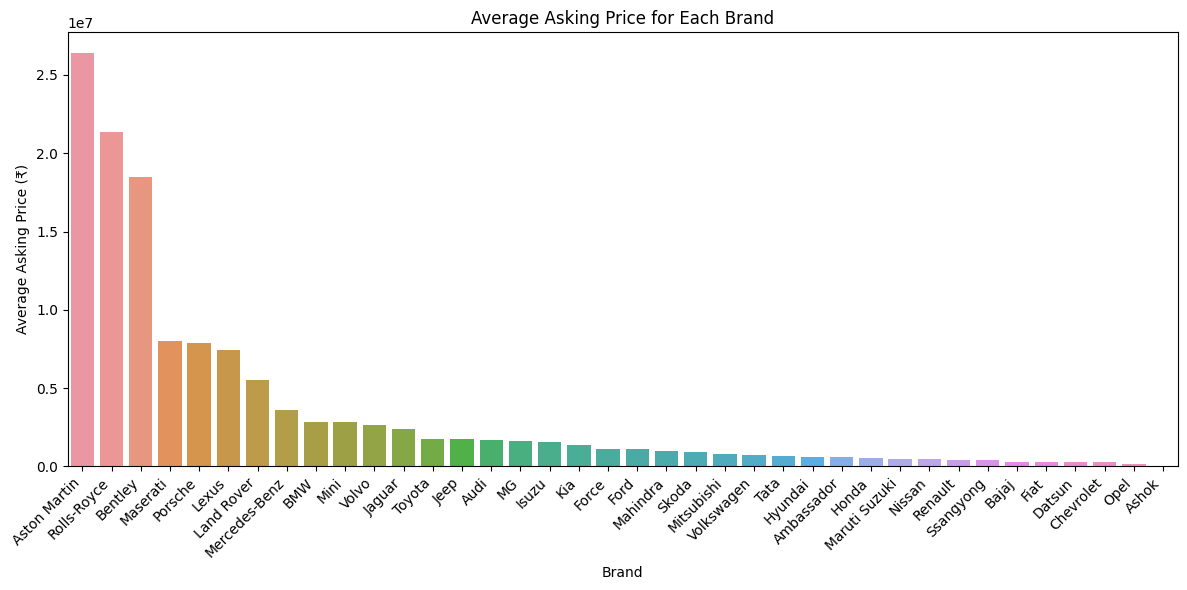

In [25]:
# Calculate the average asking price for each brand
brand_avg_price_summary = df.groupby('Brand')['AskPrice'].mean().reset_index()

# Sort the data for better visualization
brand_avg_price_summary = brand_avg_price_summary.sort_values(by='AskPrice', ascending=False)

# Create a seaborn bar plot for the average asking price by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_avg_price_summary, x='Brand', y='AskPrice')
plt.title('Average Asking Price for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Average Asking Price (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can see that a vast majority of car brands have an average AskPrice that is relatively low. Only a few brands have large AskPrices.

Now let's look at the total AskPrice for each Brand.

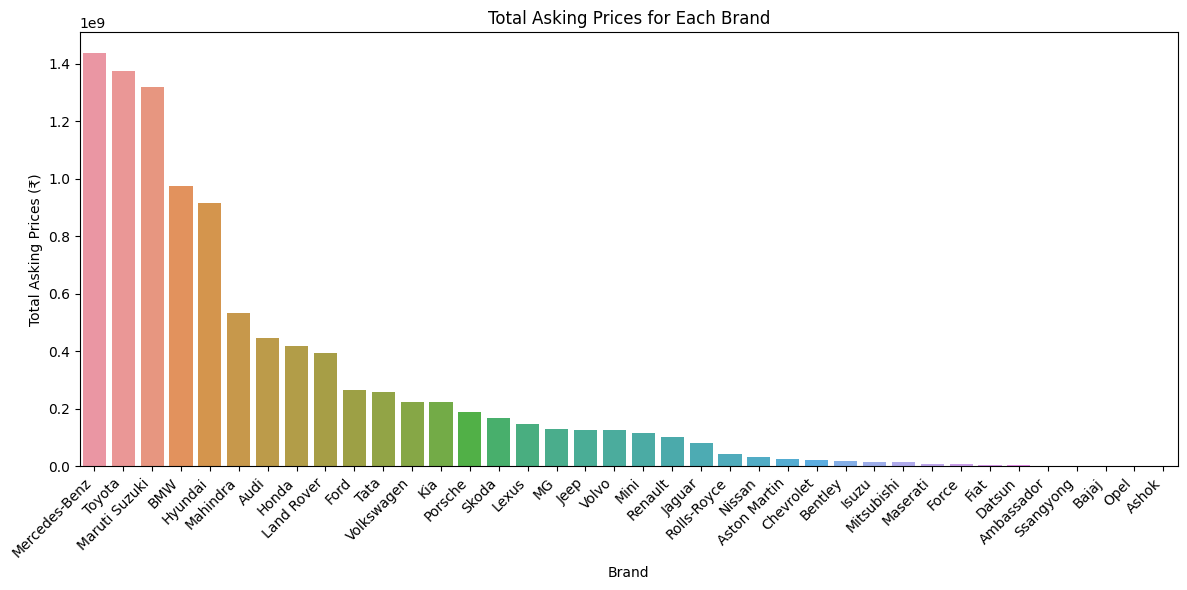

In [26]:
# Recalculate the total AskPrice by Brand
brand_price_summary = df.groupby('Brand')['AskPrice'].sum().reset_index()

# Sort the data for better visualization
brand_price_summary = brand_price_summary.sort_values(by='AskPrice', ascending=False)

# Create a seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_price_summary, x='Brand', y='AskPrice')
plt.title('Total Asking Prices for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Total Asking Prices (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now let's look at the total units sold of each Brand.

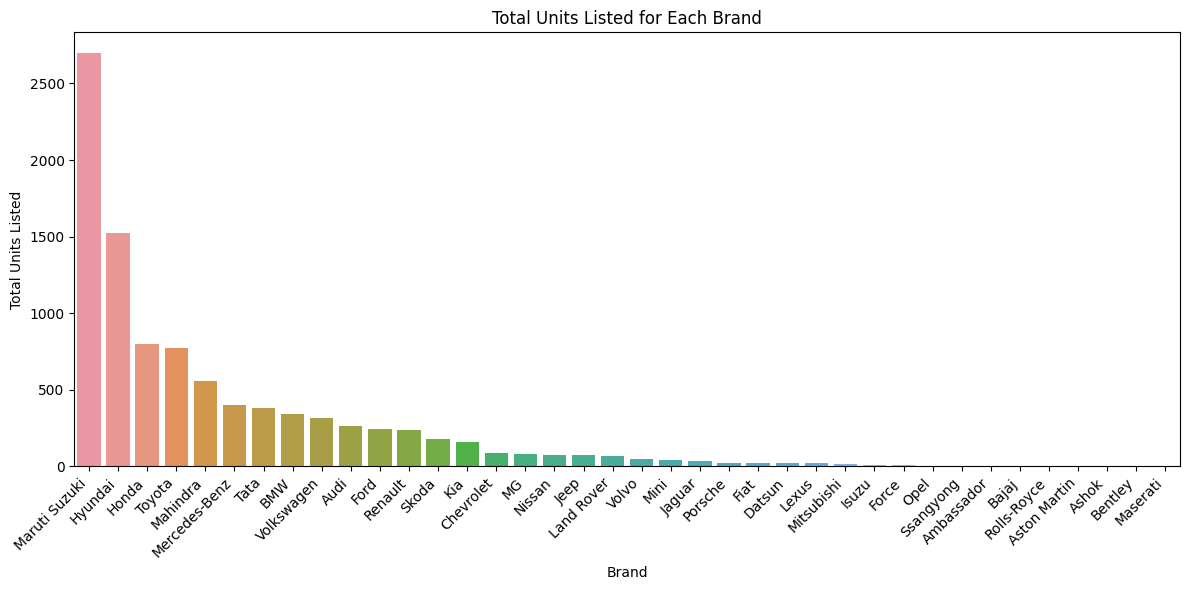

In [27]:
# Count the total units sold (assuming each row represents one unit sold)
brand_units_summary = df['Brand'].value_counts().reset_index()
brand_units_summary.columns = ['Brand', 'TotalUnitsSold']

# Sort the data for better visualization
brand_units_summary = brand_units_summary.sort_values(by='TotalUnitsSold', ascending=False)

# Create a seaborn bar plot for total units sold by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_units_summary, x='Brand', y='TotalUnitsSold')
plt.title('Total Units Listed for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Total Units Listed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now we need to encode some of the features. First, we separate numerical and categorical columns.

The 'model' and 'Brand' features have very high cardinality in a relatively small dataset. For this reasons, we will use Target Encoding on these features.

In [28]:
# Define a function for target encoding with smoothing
def target_encode(data, feature, target, smoothing=10):
    # Calculate global mean of the target
    global_mean = data[target].mean()
    
    # Calculate the mean and count for each category
    agg = data.groupby(feature)[target].agg(['mean', 'count'])
    mean = agg['mean']
    count = agg['count']
    
    # Apply smoothing formula
    smoothed_mean = (count * mean + smoothing * global_mean) / (count + smoothing)
    
    # Map the smoothed means back to the original feature
    encoded_feature = data[feature].map(smoothed_mean)
    return encoded_feature

# Ensure 'AskPrice' is numeric
df['AskPrice'] = df['AskPrice'].astype(float)

# Apply target encoding to the 'model' feature
df['model_encoded'] = target_encode(df, feature='model', target='AskPrice', smoothing=10)

# Apply target encoding to the 'Brand' feature
df['Brand_encoded'] = target_encode(df, feature='Brand', target='AskPrice', smoothing=10)

# Display the dataset with the new encoded feature
df[['model', 'model_encoded', 'Brand', 'Brand_encoded']].head()

,model,model_encoded,Brand,Brand_encoded
0,City,566024.485282,Honda,5.285156e+05
1,Innova,867903.750083,Toyota,1.768970e+06
2,VentoTest,537433.747312,Volkswagen,7.202586e+05
3,Swift,497711.741475,Maruti Suzuki,4.907008e+05
4,Baleno,649402.444206,Maruti Suzuki,4.907008e+05


Remove the 'model' and 'Brand' columns.

In [29]:
df = df.drop(columns=['model', 'Brand'])

In [30]:
df.head()

,Year,kmDriven,Transmission,Owner,FuelType,AskPrice,model_encoded,Brand_encoded
0,2001,98000,Manual,second,Petrol,195000.0,566024.485282,5.285156e+05
1,2009,190000,Manual,second,Diesel,375000.0,867903.750083,1.768970e+06
2,2010,77246,Manual,first,Diesel,184999.0,537433.747312,7.202586e+05
3,2017,83500,Manual,second,Diesel,565000.0,497711.741475,4.907008e+05
4,2019,45000,Automatic,first,Petrol,685000.0,649402.444206,4.907008e+05


Define the numerical features.

In [31]:
numerical_features = ['Year', 'kmDriven', 'AskPrice', 'model_encoded', 'Brand_encoded']  
categorical_features = ['Transmission', 'FuelType', 'Owner']

Scale the numerical data.

In [32]:
from sklearn.preprocessing import OneHotEncoder

# Encode categorical features
encoder = OneHotEncoder(sparse_output=False)
df_encoded = encoder.fit_transform(df[categorical_features])

# Convert the encoded features back to a DataFrame
encoded_feature_names = encoder.get_feature_names_out(categorical_features)
df_encoded = pd.DataFrame(df_encoded, columns=encoded_feature_names)

# Combine numerical and encoded categorical features
# df_combined = pd.concat([df_scaled[numerical_features], df_encoded], axis=1)

Combine dataframes.

In [33]:
df_encoded = df_encoded.reindex(df.index)
df_combined = pd.concat([df, df_encoded], axis=1)

Drop text-based columns.

In [34]:
df_combined.drop(columns=['Transmission', 'Owner', 'FuelType'], inplace=True)

Scale the Data

In [35]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features while preserving the index and column names
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_combined)

# Create a DataFrame with the original column names and index
df_final = pd.DataFrame(df_scaled, columns=df_combined.columns, index=df_combined.index)


In [36]:
df_final.head()

,Year,kmDriven,AskPrice,model_encoded,Brand_encoded,Transmission_Automatic,Transmission_Manual,FuelType_Diesel,FuelType_Hybrid/CNG,FuelType_Petrol,Owner_first,Owner_second
0,-3.776992,0.486525,-0.524896,-0.536862,-0.561606,-0.998841,0.998841,-0.819440,-0.498386,1.226521,-1.002849,1.002849
1,-1.811813,2.120464,-0.416566,-0.136129,0.799106,-0.998841,0.998841,1.220346,-0.498386,-0.815314,-1.002849,1.002849
2,-1.566166,0.117930,-0.530915,-0.574815,-0.351274,-0.998841,0.998841,1.220346,-0.498386,-0.815314,0.997159,-0.997159
3,0.153365,0.229002,-0.302218,-0.627544,-0.603087,-0.998841,0.998841,1.220346,-0.498386,-0.815314,-1.002849,1.002849
4,0.644660,-0.454766,-0.229998,-0.426181,-0.603087,1.001160,-1.001160,-0.819440,-0.498386,1.226521,0.997159,-0.997159


In [37]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    9535 non-null   float64
 1   kmDriven                9535 non-null   float64
 2   AskPrice                9535 non-null   float64
 3   model_encoded           9535 non-null   float64
 4   Brand_encoded           9535 non-null   float64
 5   Transmission_Automatic  9489 non-null   float64
 6   Transmission_Manual     9489 non-null   float64
 7   FuelType_Diesel         9489 non-null   float64
 8   FuelType_Hybrid/CNG     9489 non-null   float64
 9   FuelType_Petrol         9489 non-null   float64
 10  Owner_first             9489 non-null   float64
 11  Owner_second            9489 non-null   float64
dtypes: float64(12)
memory usage: 968.4 KB


Add an XGBoost model.

In [38]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Define the X and y variables
X = df_final.drop(columns=['AskPrice'])  # Replace 'AskPrice' with your target column
y = df_final['AskPrice']  # Replace 'AskPrice' with your target column

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=0
)

# Define a custom scorer for RMSE (scikit-learn default is negative MSE)
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring=rmse_scorer)

# Display the results
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean RMSE: {np.mean(cv_scores)}")
print(f"Standard Deviation of RMSE: {np.std(cv_scores)}")


Cross-Validation RMSE Scores: [0.57193908 0.63091615 0.30157833 0.43388178 0.39128636]
Mean RMSE: 0.46592033970674834
Standard Deviation of RMSE: 0.12005713935009221
